11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
469/469 - 17s - 35ms/step - accuracy: 0.9285 - loss: 0.2354 - val_accuracy: 0.9837 - val_loss: 0.0505
Epoch 2/12
469/469 - 10s - 21ms/step - accuracy: 0.9753 - loss: 0.0845 - val_accuracy: 0.9861 - val_loss: 0.0368
Epoch 3/12
469/469 - 4s - 8ms/step - accuracy: 0.9809 - loss: 0.0626 - val_accuracy: 0.9885 - val_loss: 0.0329
Epoch 4/12
469/469 - 5s - 10ms/step - accuracy: 0.9843 - loss: 0.0502 - val_accuracy: 0.9898 - val_loss: 0.0301
Epoch 5/12
469/469 - 3s - 7ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9911 - val_loss: 0.0278
Epoch 6/12
469/469 - 5s - 11ms/step - accuracy: 0.9882 - loss: 0.0381 - val_accuracy: 0.9908 - val_loss: 0.0304
Epoch 7/12
469/469 - 3s - 7ms/step - accuracy: 0.9887 - loss: 0.0341 - val_accuracy: 0.9912 - val_loss: 0.0259
Epoch 8/12
469/469 - 5s - 11ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9924 - val_loss: 0.0258
Epoch 9/12
469/469 - 5s - 11ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9924 - val_loss: 

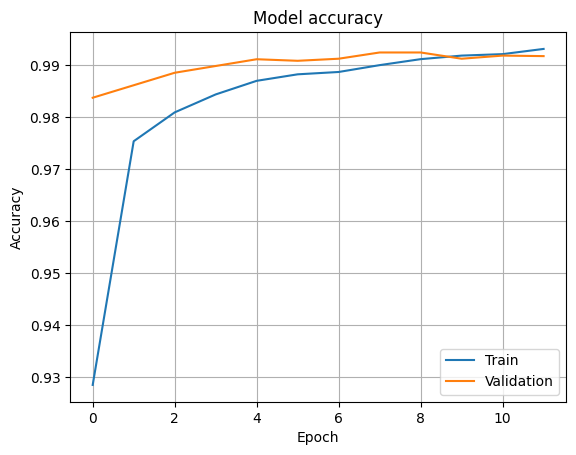

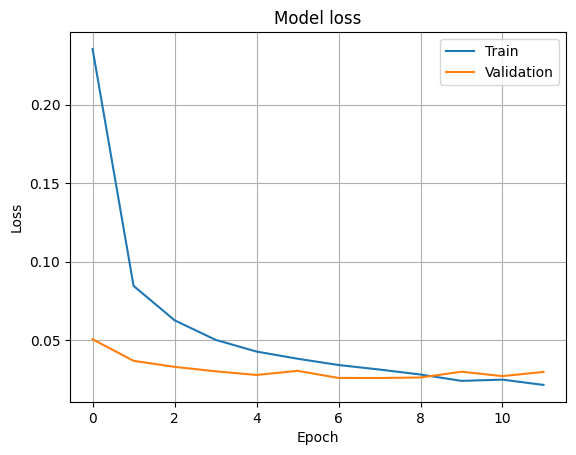

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# C-C-P-FC-FC 구조의 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

res=cnn.evaluate(x_test, y_test, verbose=0)
print('정확률은', res[1]*100)

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()